In [1]:
!ls

5_6.ipynb                              ml-latest-small
5_6_1.ipynb                            sample.json
Untitled.ipynb                         test.py
ml-1m                                  usagov_bitly_data2013-05-17-1368832207


In [2]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
%matplotlib inline

In [18]:
#体重と脳みその重さの関係性を考える

### 文字列で直接読み込んだ方法！########################3#########
from io import StringIO
### ネットからデータを取ってきたらcsvでも中に文字列として読み込まれているので
### csvファイルから取らなくても stringIOすると
data = \
"""Index brainWeight bodyWeight
1     3.385    44.500
 2     0.480    15.500
 3     1.350     8.100
 4   465.000   423.000
 5    36.330   119.500
 6    27.660   115.000
 7    14.830    98.200
 8     1.040     5.500
 9     4.190    58.000
10     0.425     6.400
11     0.101     4.000
12     0.920     5.700
13     1.000     6.600
14     0.005     0.140
15     0.060     1.000
16     3.500    10.800
17     2.000    12.300
18     1.700     6.300
19  2547.000  4603.000
20     0.023     0.300
21   187.100   419.000
22   521.000   655.000
23     0.785     3.500
24    10.000   115.000
25     3.300    25.600
26     0.200     5.000
27     1.410    17.500
28   529.000   680.000
29   207.000   406.000
30    85.000   325.000
31     0.750    12.300
32    62.000  1320.000
33  6654.000  5712.000
34     3.500     3.900
35     6.800   179.000
36    35.000    56.000
37     4.050    17.000
38     0.120     1.000
39     0.023     0.400
40     0.010     0.250
41     1.400    12.500
42   250.000   490.000
43     2.500    12.100
44    55.500   175.000
45   100.000   157.000
46    52.160   440.000
47    10.550   179.500
48     0.550     2.400
49    60.000    81.000
50     3.600    21.000
51     4.288    39.200
52     0.280     1.900
53     0.075     1.200
54     0.122     3.000
55     0.048     0.330
56   192.000   180.000
57     3.000    25.000
58   160.000   169.000
59     0.900     2.600
60     1.620    11.400
61     0.104     2.500
62     4.235    50.400
"""
data

'Index brainWeight bodyWeight\n1     3.385    44.500\n 2     0.480    15.500\n 3     1.350     8.100\n 4   465.000   423.000\n 5    36.330   119.500\n 6    27.660   115.000\n 7    14.830    98.200\n 8     1.040     5.500\n 9     4.190    58.000\n10     0.425     6.400\n11     0.101     4.000\n12     0.920     5.700\n13     1.000     6.600\n14     0.005     0.140\n15     0.060     1.000\n16     3.500    10.800\n17     2.000    12.300\n18     1.700     6.300\n19  2547.000  4603.000\n20     0.023     0.300\n21   187.100   419.000\n22   521.000   655.000\n23     0.785     3.500\n24    10.000   115.000\n25     3.300    25.600\n26     0.200     5.000\n27     1.410    17.500\n28   529.000   680.000\n29   207.000   406.000\n30    85.000   325.000\n31     0.750    12.300\n32    62.000  1320.000\n33  6654.000  5712.000\n34     3.500     3.900\n35     6.800   179.000\n36    35.000    56.000\n37     4.050    17.000\n38     0.120     1.000\n39     0.023     0.400\n40     0.010     0.250\n41     1.4

             brainWeight  bodyWeight
brainWeight     1.000000    0.934164
bodyWeight      0.934164    1.000000


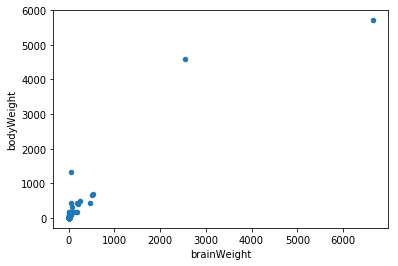

In [29]:
############## コピペで用意したstring型ファイルを以下手順でいきなりDataFrameにすることができる!!############
###本来的にCSVファイルを作成してと思いがちだけどPandasだとこれで出来るので、効率的##############
## StringIO(data) をすると、あたかもcsvデータのように考えられてjupyter上でDataFrameに生成される#####

df = pd.read_csv(StringIO(data), sep='\s+', engine='python')[['brainWeight','bodyWeight']] # sep= '\s+' これで１こ以上の空白をあらわしている
df.plot(kind='scatter', x='brainWeight',y='bodyWeight')
print(df.corr())

Intercept    -56.855545
bodyWeight     0.902913
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            brainWeight   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     411.2
Date:                Sun, 07 May 2017   Prob (F-statistic):           1.54e-28
Time:                        09:03:27   Log-Likelihood:                -445.27
No. Observations:                  62   AIC:                             894.5
Df Residuals:                      60   BIC:                             898.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -56.8555     42.978     -1.323      0.191    -142.824      29.113
bodyWeight     0.9029      0.045     20.278      0.000       0.814       0.992
==============================================================================
Omnibus:                       35.627   Durbin-Watson:                   2.548
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              784.333
Skew:                          -0.627   Prob(JB):                    4.83e-171
Kurtosis:                      20.379   Cond. No.                     1.01e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

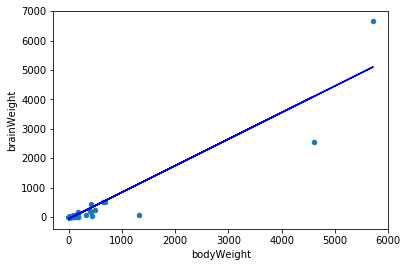

In [43]:
from io import StringIO
#import statsmodels.api as sm
import statsmodels.formula.api as smf
from matplotlib import pyplot as plt

results = smf.ols('brainWeight ~ bodyWeight', data=df).fit()  # brainWeight ~ bodyWeight の ~ は、比例してという意味
# ols が回帰分析してくれる(何を目的変数にするかを左 ~ 右で説明します)
# smf.ols('brainWeight ~ bodyWeight +  ,  +  , )で説明変数を増やしていける
# smf.ols('brainWeight ~ bodyWeight**2') や smf.ols('brainWeight ~ bodyWeight -1') など一般的な式を入れることができる
# 詳しくはドキュメントを http://www.statsmodels.org/stable/index.html 

df.plot(kind='scatter', x='bodyWeight', y='brainWeight') 

#以下の分析計算した結果をplotしている results.params に値が入っている
# df[['bodyWeight']].values がX軸の値, Y軸の値がその後results.params['bodyWeight'] * df[['bodyWeight']].values + results.params['Intercept']
plt.plot(df[['bodyWeight']].values, results.params['bodyWeight'] * df[['bodyWeight']].values + results.params['Intercept'], color='blue')

print(results.params)

results.summary()    

# intercept 切片, bodyWeight 傾き 
# coef は係数の略 (results.params['bodyWeight'] で 以下表のcoefが出せる) 
#  brainWeight = 0.9029(bodyWeight) - 56.855545(切片) ができている 
# 決定係数 (R-squared) は、線形回帰モデルの独立変数 X で説明される応答変数 y の変化に比例する量を表します。 決定係数が大きいほど、線形回帰モデルで説明される変動性が大きくなります。
# http://mathtrain.jp/ketteikeisu (決定係数と相関係数の意味)
# 相関係数とは 二組の対応するデータ (X,Y) に対して，相関係数 ρ を以下で定義する,ただし，Cov(X,Y) は共分散，σX と σY は標準偏差です。

In [48]:
data = \
"""
Index A1 A2 A3 A4 A5 A6 A7 A8 A9 A10 A11 A12 A13 A14 A15 B 
 1  36  27  71   8.1  3.34  11.4  81.5  3243   8.8  42.6  11.7   21   15   59  59   921.870
 2  35  23  72  11.1  3.14  11.0  78.8  4281   3.6  50.7  14.4    8   10   39  57   997.875
 3  44  29  74  10.4  3.21   9.8  81.6  4260   0.8  39.4  12.4    6    6   33  54   962.354
 4  47  45  79   6.5  3.41  11.1  77.5  3125  27.1  50.2  20.6   18    8   24  56   982.291
 5  43  35  77   7.6  3.44   9.6  84.6  6441  24.4  43.7  14.3   43   38  206  55  1071.289
 6  53  45  80   7.7  3.45  10.2  66.8  3325  38.5  43.1  25.5   30   32   72  54  1030.380
 7  43  30  74  10.9  3.23  12.1  83.9  4679   3.5  49.2  11.3   21   32   62  56   934.700
 8  45  30  73   9.3  3.29  10.6  86.0  2140   5.3  40.4  10.5    6    4    4  56   899.529
 9  36  24  70   9.0  3.31  10.5  83.2  6582   8.1  42.5  12.6   18   12   37  61  1001.902
10  36  27  72   9.5  3.36  10.7  79.3  4213   6.7  41.0  13.2   12    7   20  59   912.347
11  52  42  79   7.7  3.39   9.6  69.2  2302  22.2  41.3  24.2   18    8   27  56  1017.613
12  33  26  76   8.6  3.20  10.9  83.4  6122  16.3  44.9  10.7   88   63  278  58  1024.885
13  40  34  77   9.2  3.21  10.2  77.0  4101  13.0  45.7  15.1   26   26  146  57   970.467
14  35  28  71   8.8  3.29  11.1  86.3  3042  14.7  44.6  11.4   31   21   64  60   985.950
15  37  31  75   8.0  3.26  11.9  78.4  4259  13.1  49.6  13.9   23    9   15  58   958.839
16  35  46  85   7.1  3.22  11.8  79.9  1441  14.8  51.2  16.1    1    1    1  54   860.101
17  36  30  75   7.5  3.35  11.4  81.9  4029  12.4  44.0  12.0    6    4   16  58   936.234
18  15  30  73   8.2  3.15  12.2  84.2  4824   4.7  53.1  12.7   17    8   28  38   871.766
19  31  27  74   7.2  3.44  10.8  87.0  4834  15.8  43.5  13.6   52   35  124  59   959.221
20  30  24  72   6.5  3.53  10.8  79.5  3694  13.1  33.8  12.4   11    4   11  61   941.181
21  31  45  85   7.3  3.22  11.4  80.7  1844  11.5  48.1  18.5    1    1    1  53   891.708
22  31  24  72   9.0  3.37  10.9  82.8  3226   5.1  45.2  12.3    5    3   10  61   871.338
23  42  40  77   6.1  3.45  10.4  71.8  2269  22.7  41.4  19.5    8    3    5  53   971.122
24  43  27  72   9.0  3.25  11.5  87.1  2909   7.2  51.6   9.5    7    3   10  56   887.466
25  46  55  84   5.6  3.35  11.4  79.7  2647  21.0  46.9  17.9    6    5    1  59   952.529
26  39  29  76   8.7  3.23  11.4  78.6  4412  15.6  46.6  13.2   13    7   33  60   968.665
27  35  31  81   9.2  3.10  12.0  78.3  3262  12.6  48.6  13.9    7    4    4  55   919.729
28  43  32  74  10.1  3.38   9.5  79.2  3214   2.9  43.7  12.0   11    7   32  54   844.053
29  11  53  68   9.2  2.99  12.1  90.6  4700   7.8  48.9  12.3  648  319  130  47   861.833
30  30  35  71   8.3  3.37   9.9  77.4  4474  13.1  42.6  17.7   38   37  193  57   989.265
31  50  42  82   7.3  3.49  10.4  72.5  3497  36.7  43.3  26.4   15   10   34  59  1006.490
32  60  67  82  10.0  2.98  11.5  88.6  4657  13.6  47.3  22.4    3    1    1  60   861.439
33  30  20  69   8.8  3.26  11.1  85.4  2934   5.8  44.0   9.4   33   23  125  64   929.150
34  25  12  73   9.2  3.28  12.1  83.1  2095   2.0  51.9   9.8   20   11   26  50   857.622
35  45  40  80   8.3  3.32  10.1  70.3  2682  21.0  46.1  24.1   17   14   78  56   961.009
36  46  30  72  10.2  3.16  11.3  83.2  3327   8.8  45.3  12.2    4    3    8  58   923.234
37  54  54  81   7.4  3.36   9.7  72.8  3172  31.4  45.5  24.2   20   17    1  62  1113.156
38  42  33  77   9.7  3.03  10.7  83.5  7462  11.3  48.7  12.4   41   26  108  58   994.648
39  42  32  76   9.1  3.32  10.5  87.5  6092  17.5  45.3  13.2   29   32  161  54  1015.023
40  36  29  72   9.5  3.32  10.6  77.6  3437   8.1  45.5  13.8   45   59  263  56   991.290
41  37  38  67  11.3  2.99  12.0  81.5  3387   3.6  50.3  13.5   56   21   44  73   893.991
42  42  29  72  10.7  3.19  10.1  79.5  3508   2.2  38.3  15.7    6    4   18  56   938.500
43  41  33  77  11.2  3.08   9.6  79.9  4843   2.7  38.6  14.1   11   11   89  54   946.185
44  44  39  78   8.2  3.32  11.0  79.9  3768  28.6  49.5  17.5   12    9   48  53  1025.502
45  32  25  72  10.9  3.21  11.1  82.5  4355   5.0  46.4  10.8    7    4   18  60   874.281
46  34  32  79   9.3  3.23   9.7  76.8  5160  17.2  45.1  15.3   31   15   68  57   953.560
47  10  55  70   7.3  3.11  12.1  88.9  3033   5.9  51.0  14.0  144   66   20  61   839.709
48  18  48  63   9.2  2.92  12.2  87.7  4253  13.7  51.2  12.0  311  171   86  71   911.701
49  13  49  68   7.0  3.36  12.2  90.7  2702   3.0  51.9   9.7  105   32    3  71   790.733
50  35  40  64   9.6  3.02  12.2  82.5  3626   5.7  54.3  10.1   20    7   20  72   899.264
51  45  28  74  10.6  3.21  11.1  82.6  1883   3.4  41.9  12.3    5    4   20  56   904.155
52  38  24  72   9.8  3.34  11.4  78.0  4923   3.8  50.5  11.1    8    5   25  61   950.672
53  31  26  73   9.3  3.22  10.7  81.3  3249   9.5  43.9  13.6   11    7   25  59   972.464
54  40  23  71  11.3  3.28  10.3  73.8  1671   2.5  47.4  13.5    5    2   11  60   912.202
55  41  37  78   6.2  3.25  12.3  89.5  5308  25.9  59.7  10.3   65   28  102  52   967.803
56  28  32  81   7.0  3.27  12.1  81.0  3665   7.5  51.6  13.2    4    2    1  54   823.764
57  45  33  76   7.7  3.39  11.3  82.2  3152  12.1  47.3  10.9   14   11   42  56  1003.502
58  45  24  70  11.8  3.25  11.1  79.8  3678   1.0  44.8  14.0    7    3    8  56   895.696
59  42  83  76   9.7  3.22   9.0  76.2  9699   4.8  42.2  14.5    8    8   49  54   911.817
60  38  28  72   8.9  3.48  10.7  79.8  3451  11.7  37.5  13.0   14   13   39  58   954.442
"""

In [49]:
df = pd.read_csv(StringIO(data),sep='\s+', engine='python')
df

,Index,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,B
0,1,36,27,71,8.1,3.34,11.4,81.5,3243,8.8,42.6,11.7,21,15,59,59,921.870
1,2,35,23,72,11.1,3.14,11.0,78.8,4281,3.6,50.7,14.4,8,10,39,57,997.875
2,3,44,29,74,10.4,3.21,9.8,81.6,4260,0.8,39.4,12.4,6,6,33,54,962.354
3,4,47,45,79,6.5,3.41,11.1,77.5,3125,27.1,50.2,20.6,18,8,24,56,982.291
4,5,43,35,77,7.6,3.44,9.6,84.6,6441,24.4,43.7,14.3,43,38,206,55,1071.289
5,6,53,45,80,7.7,3.45,10.2,66.8,3325,38.5,43.1,25.5,30,32,72,54,1030.380
6,7,43,30,74,10.9,3.23,12.1,83.9,4679,3.5,49.2,11.3,21,32,62,56,934.700
7,8,45,30,73,9.3,3.29,10.6,86.0,2140,5.3,40.4,10.5,6,4,4,56,899.529
8,9,36,24,70,9.0,3.31,10.5,83.2,6582,8.1,42.5,12.6,18,12,37,61,1001.902
9,10,36,27,72,9.5,3.36,10.7,79.3,4213,6.7,41.0,13.2,12,7,20,59,912.347


/Users/hiroshiteraoka/GW/app_venv/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10cba3240>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11abcd780>]], dtype=object)

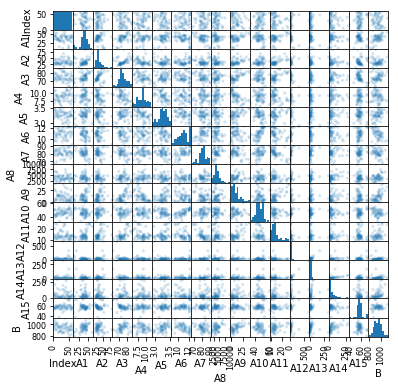

In [50]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(df, alpha=0.2, figsize=(6,6))

In [53]:
# 重回帰分析の場合
# smf.ols(中身の書き方)
# 'B ~ %s' % '+'.join(中身を+でくっつけるよ) << 中身 >> [['A%s' % i  pythonでは 文字列は'A%s' % i で受け取れる]

results = smf.ols('B ~ %s' % '+'.join(['A%s' % i for i in range(1, 16)]), data=df).fit() 
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      B   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     11.63
Date:                Sun, 07 May 2017   Prob (F-statistic):           9.56e-11
Time:                        09:35:57   Log-Likelihood:                -284.40
No. Observations:                  60   AIC:                             600.8
Df Residuals:                      44   BIC:                             634.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1863.1573    410.828      4.535      0.000    1035.187    2691.128
A1             2.0724      0.842      2.462      0.018       0.376       3.769
A2            -2.1776      0.675     -3.225      0.002      -3.538      -0.817
A3            -2.8338      1.771     -1.600      0.117      -6.403       0.735
A4           -14.0421      7.746     -1.813      0.077     -29.654       1.570
A5          -115.4321     62.004     -1.862      0.069    -240.392       9.528
A6           -24.2471     11.212     -2.163      0.036     -46.843      -1.651
A7            -1.1460      1.467     -0.781      0.439      -4.102       1.810
A8             0.0100      0.004      2.435      0.019       0.002       0.018
A9             3.5332      1.282      2.755      0.009       0.949       6.118
A10            0.5229      1.551      0.337      0.738      -2.603       3.649
A11            0.2671      2.565      0.104      0.918      -4.903       5.437
A12           -0.8890      0.452     -1.965      0.056      -1.801       0.023
A13            1.8664      0.934      1.997      0.052      -0.017       3.750
A14           -0.0345      0.142     -0.242      0.810      -0.321       0.252
A15            0.5331      1.052      0.507      0.615      -1.586       2.653
==============================================================================
Omnibus:                        2.314   Durbin-Watson:                   2.325
Prob(Omnibus):                  0.314   Jarque-Bera (JB):                1.650
Skew:                           0.098   Prob(JB):                        0.438
Kurtosis:                       3.788   Cond. No.                     4.11e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.11e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

21.0